# Prophet 

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Since this is a one of the industries current favorites we also wanted to line up our data against this model just for exploring and testing purposes.

### Install Dependencies

In [8]:
!pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from fbprophet import Prophet

In [3]:
import pandas as pd

In [1]:
import warnings
warnings.simplefilter('ignore')

### Import and Process Data

1. Import the data
2. Convert date to a datetime format
3. Rename Date as ds and price as y - Prophet requires the data to be named as such

In [4]:
!pip3 install pickle5
import pickle5 as pickle
with open('/content/drive/MyDrive/Timeseries_data.pkl', "rb") as fh:
  data = pickle.load(fh)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 30.5 MB/s 


In [5]:
data.sample(5)

,Date,Weighted_price
501,2014-04-15,187.351276
1470,2018-03-22,330.181468
2275,2021-06-29,374.131322
1246,2017-04-28,341.305361
2140,2020-12-10,347.266109


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2463 non-null   datetime64[ns]
 1   Weighted_price  2463 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.6 KB


In [7]:
data["Date"]= pd.to_datetime(data["Date"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2463 non-null   datetime64[ns]
 1   Weighted_price  2463 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.6 KB


In [11]:
df = data.rename(columns={'Date': 'ds', 'Weighted_price': 'y'})

### Build and Train the model

In [12]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

### Forecast and Visualise

In [23]:
future = m.make_future_dataframe(periods=30,freq='D')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2488,2022-04-25,449.155456,422.574511,475.863302,447.682069,451.213113,-0.067065,-0.067065,-0.067065,1.224497,...,-1.405838,-1.405838,-1.405838,0.114277,0.114277,0.114277,0.0,0.0,0.0,449.088392
2489,2022-04-26,449.399858,424.815516,474.169993,447.692463,451.615783,-0.199928,-0.199928,-0.199928,1.224497,...,-1.299414,-1.299414,-1.299414,-0.125011,-0.125011,-0.125011,0.0,0.0,0.0,449.199930
2490,2022-04-27,449.644259,424.020991,476.126251,447.825732,451.969450,-0.684050,-0.684050,-0.684050,1.224497,...,-1.516241,-1.516241,-1.516241,-0.392306,-0.392306,-0.392306,0.0,0.0,0.0,448.960208
2491,2022-04-28,449.888660,426.231953,474.428998,447.943035,452.322686,-0.562697,-0.562697,-0.562697,1.224497,...,-1.107340,-1.107340,-1.107340,-0.679854,-0.679854,-0.679854,0.0,0.0,0.0,449.325963
2492,2022-04-29,450.133061,422.715229,472.504318,448.109208,452.861087,-1.148366,-1.148366,-1.148366,1.224497,...,-1.393504,-1.393504,-1.393504,-0.979358,-0.979358,-0.979358,0.0,0.0,0.0,448.984695


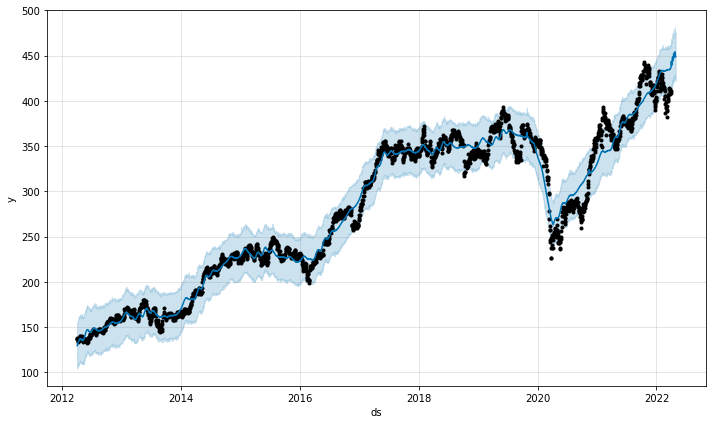

In [24]:
plot1 = m.plot(forecast)

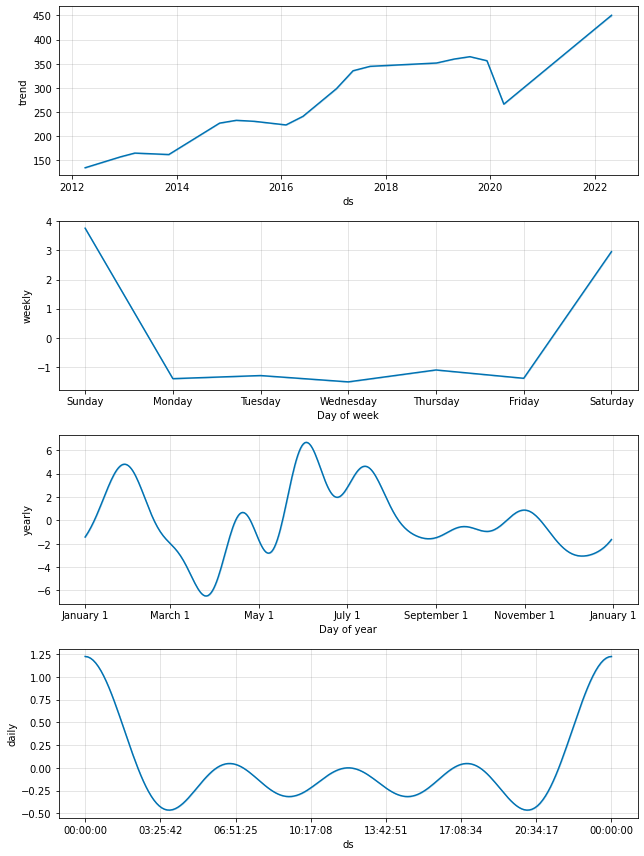

In [25]:
plt2 = m.plot_components(forecast)

The benefits of this model is that it shows us seasonality on a daily, weekly and yearly basis.

We can also see that the predicted values almost cover all actual values with a 95% Confidence Interval

In [26]:
forecast.to_csv('/content/drive/MyDrive/FBProphet_predictions_forecast.csv')